# SHAP values

Deep SHAP is a high-speed approximation algorithm for SHAP values in deep learning models that builds on a connection with DeepLIFT described in the SHAP NIPS paper. 

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import shap

from tensorflow.keras.models import load_model

DATA_DIR = '../Datasets/'
MODELS_DIR = '../Models/'

# TRAIN_PATH = DATA_DIR + '/Dataset_train.csv'
# TRAIN_CF_PATH = DATA_DIR + '/Dataset_train_CF.csv'

TEST_PATH = DATA_DIR + '/Dataset_test.csv'
TEST_CF_PATH = DATA_DIR + '/Dataset_test_CF.csv'

MODEL_PATH = MODELS_DIR + 'Pres_hybrid.h5'
MODEL_CF_PATH = MODELS_DIR + 'Pres_hybrid_CF.h5'

SAMPLES = 10_000

Load datasets and model, then fit explainer and return SHAP values:

In [75]:
def show_shap_values(test_path, model_path, reduced_size=None):
    
    model = load_model(model_path)

    X_test = pd.read_csv(test_path, index_col=0)
    X_test.reset_index(drop=True, inplace=True)

    if reduced_size:
        test_data = X_test.sample(n=reduced_size, replace=False).to_numpy()
    else:
        test_data = X_test.to_numpy()

    explainer = shap.Explainer(model, test_data, feature_names=X_test.columns)
    shap_values = explainer(test_data)

    return shap_values

## Default model

Plots for the vanilla model and dataset.

In [76]:
shap_values_default = show_shap_values(TEST_PATH, MODEL_PATH, SAMPLES)

PermutationExplainer explainer: 10001it [05:42, 28.38it/s]                          


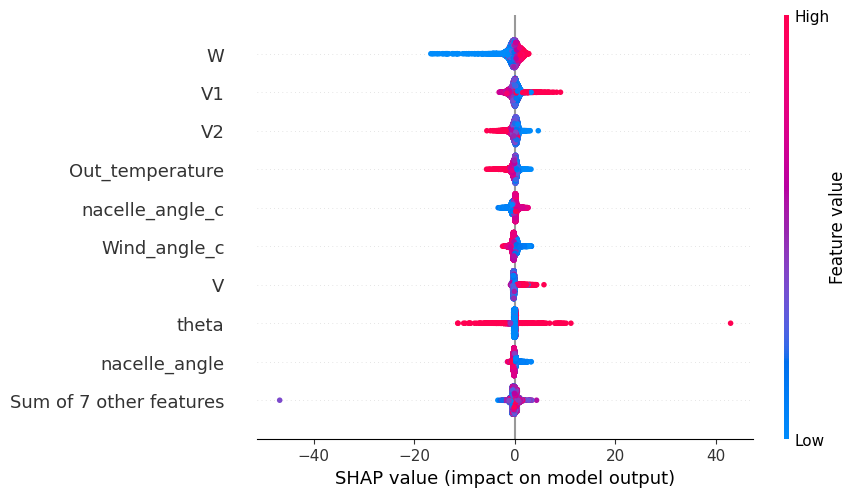

In [77]:
shap.plots.beeswarm(shap_values_default, max_display=10)

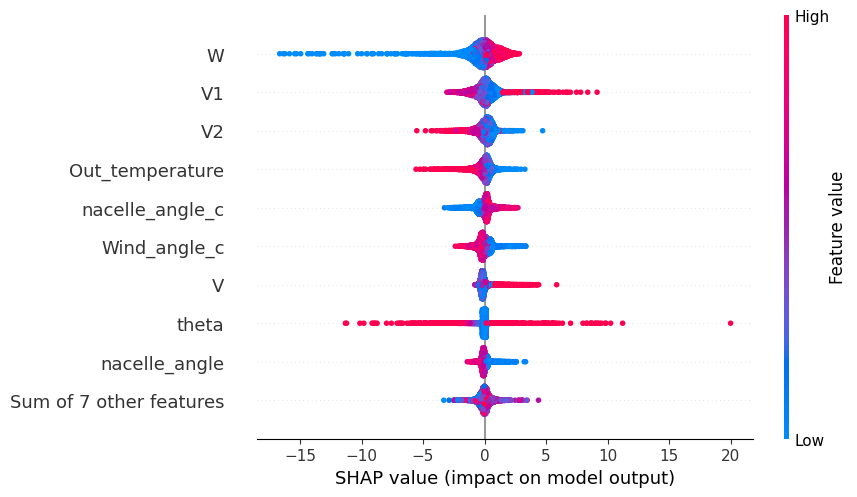

In [84]:
# Removing outliers:
shap_values_default_no_out = shap_values_default
shap_values_default_no_out.values = np.clip(shap_values_default_no_out.values, -20, 20)

shap.plots.beeswarm(shap_values_default_no_out, max_display=10)

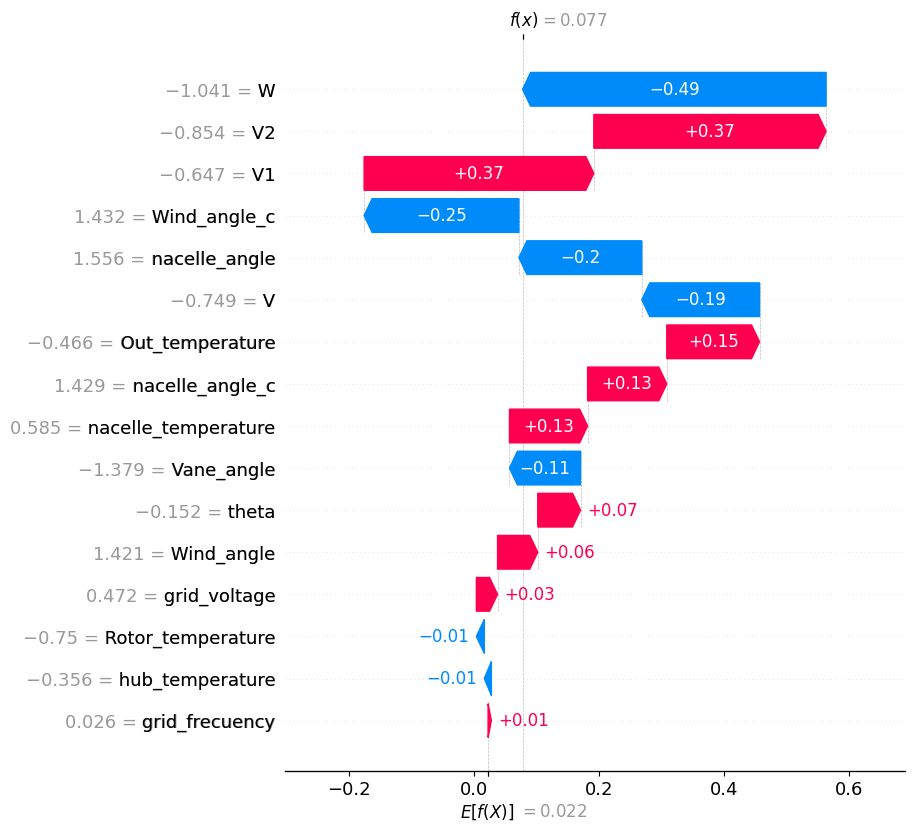

In [78]:
shap.plots.waterfall(shap_values_default[0], max_display=20)

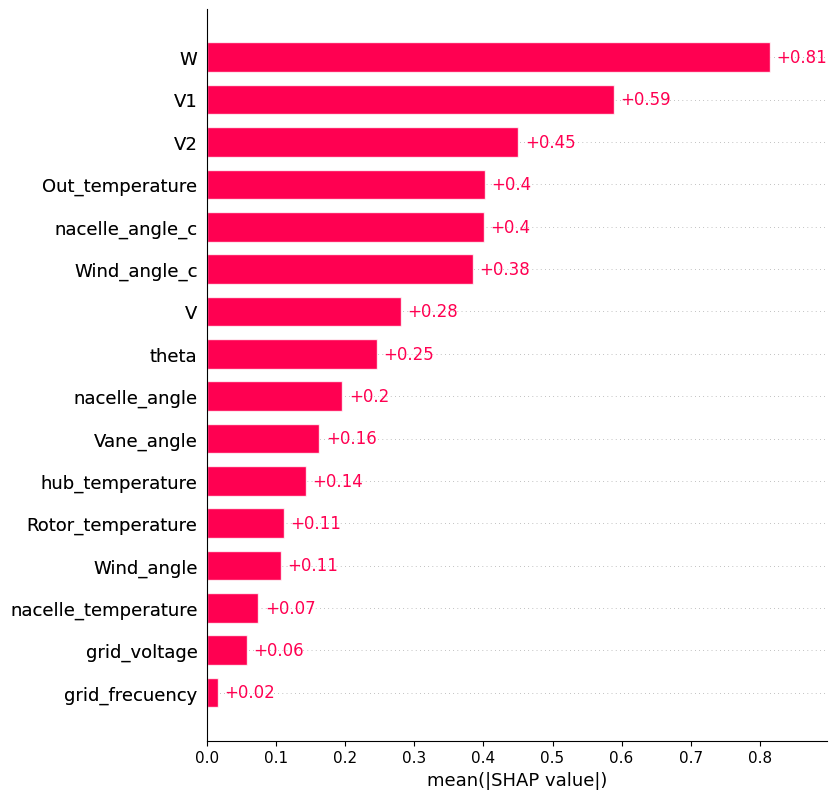

In [79]:
shap.plots.bar(shap_values_default, max_display=20)

## CF Model

Plots for the reduced case after applying correlation filter.

In [80]:
shap_values_CF = show_shap_values(TEST_CF_PATH, MODEL_CF_PATH, SAMPLES)

PermutationExplainer explainer: 10001it [11:26, 14.35it/s]                           


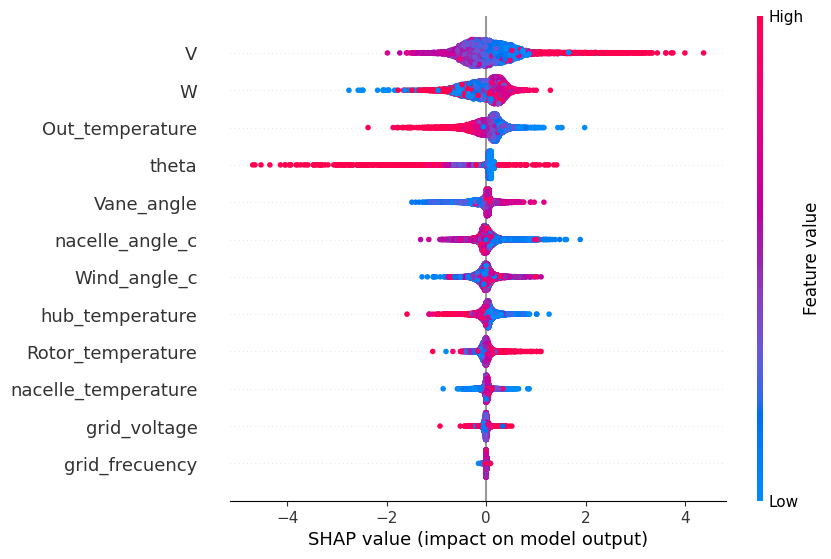

In [87]:
shap.plots.beeswarm(shap_values_CF, max_display=20)

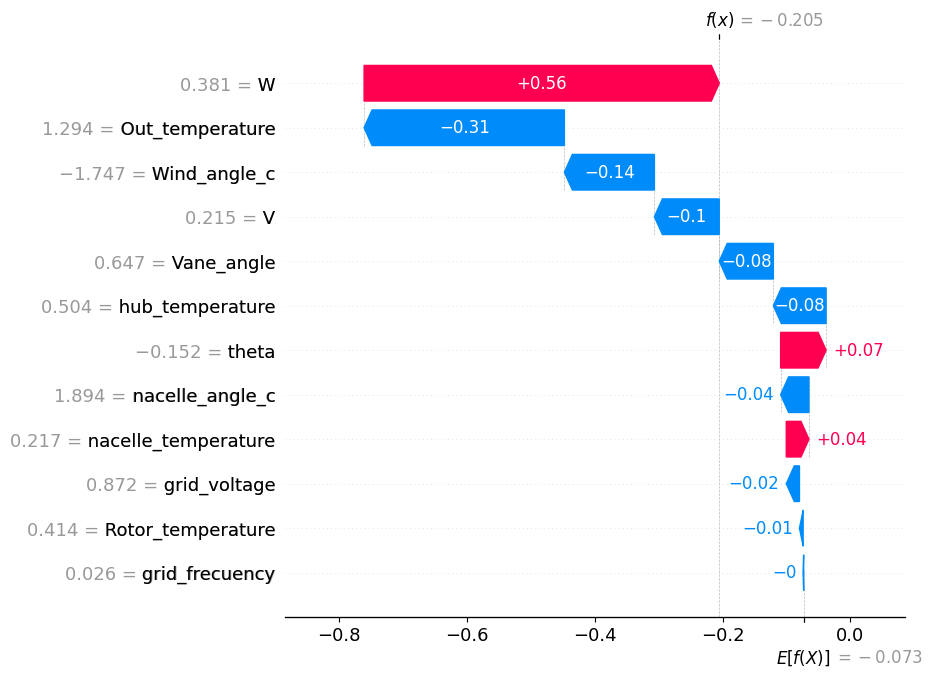

In [82]:
shap.plots.waterfall(shap_values_CF[0], max_display=20)

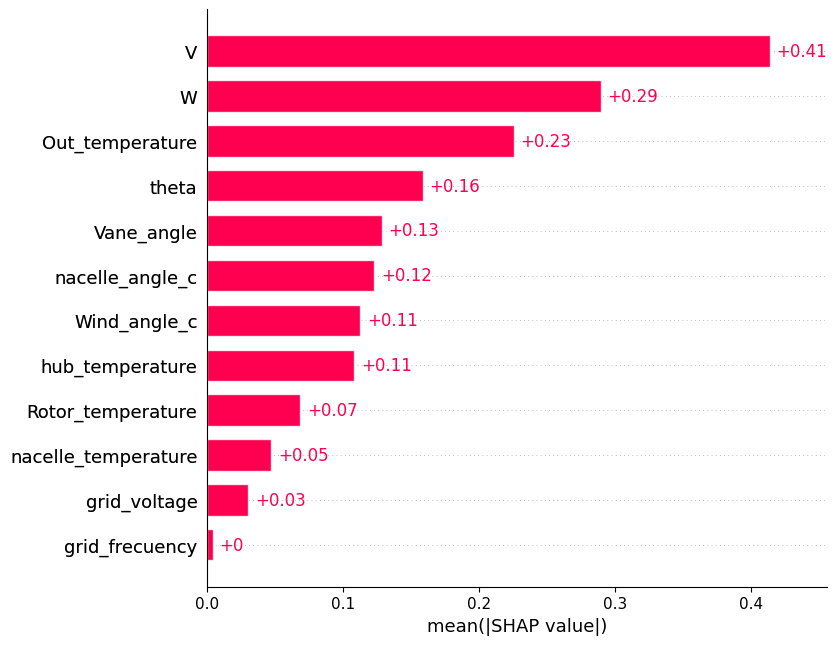

In [83]:
shap.plots.bar(shap_values_CF, max_display=20)